In [1]:
# Cell 1: Import necessary libraries and read data
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

In [5]:
# Read data
csv_path = "./api_data/monthly_api_data.csv"
data = pd.read_csv(csv_path, parse_dates=["Month"], thousands=',')
data = data.sort_values(by="Month")

FileNotFoundError: [Errno 2] No such file or directory: './api_data/monthly_api_data.csv'

In [9]:
# Cell 1: Display all columns and their basic info
print("Column Overview:")
print("-" * 50)
print(data.info())
print("\nSample of first few rows:")
print(data.head())

Column Overview:
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Index: 222 entries, 0 to 221
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        222 non-null    datetime64[ns]
 1   Measurement  222 non-null    object        
 2   Phase        222 non-null    object        
 3   Consumption  222 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 8.7+ KB
None

Sample of first few rows:
       Month      Measurement   Phase  Consumption
0 2022-09-01  Grid Organi lbc  PHASEB     304835.7
1 2022-09-01  Grid Organi lbc  PHASEC     308039.5
2 2022-09-01         Chargers  PHASEA     314498.6
3 2022-10-01  Grid Organi lbc  PHASEB     853876.7
4 2022-10-01  Grid Organi lbc  PHASEC     923577.4


In [10]:
# Cell 2: Group columns by type
column_groups = {
    'Grid Columns': [col for col in data.columns if 'Grid' in col],
    'Charger Columns': [col for col in data.columns if 'Charger' in col],
    'Solar Columns': [col for col in data.columns if 'Solar' in col],
    'Other Columns': [col for col in data.columns if not any(x in col for x in ['Grid', 'Charger', 'Solar'])]
}

print("\nColumn Groupings:")
print("-" * 50)
for group, cols in column_groups.items():
    print(f"\n{group}:")
    for col in cols:
        print(f"  - {col}")


Column Groupings:
--------------------------------------------------

Grid Columns:

Charger Columns:

Solar Columns:

Other Columns:
  - Month
  - Measurement
  - Phase
  - Consumption


In [11]:
# Cell 3: Calculate and display meaningful combinations
print("\nUseful Combined Metrics:")
print("-" * 50)

# Total Grid consumption
data['Total Grid'] = data[[col for col in data.columns if 'Grid' in col]].sum(axis=1)

# Total Solar production
data['Total Solar'] = data[[col for col in data.columns if 'Solar' in col]].sum(axis=1)

# Front vs Back Chargers
data['Total Front Chargers'] = data[['Chargers (L1) [kW]', 'Chargers (L2) [kW]', 'Chargers (L3) [kW]']].sum(axis=1)
data['Total Back Chargers'] = data[['Chargers achteraan (L1) [kW]', 'Chargers achteraan (L2) [kW]', 'Chargers achteraan (L3) [kW]']].sum(axis=1)

# Phase-wise totals (L1, L2, L3)
data['Total L1'] = data[[col for col in data.columns if 'L1' in col]].sum(axis=1)
data['Total L2'] = data[[col for col in data.columns if 'L2' in col]].sum(axis=1)
data['Total L3'] = data[[col for col in data.columns if 'L3' in col]].sum(axis=1)

# Display summary statistics for combined metrics
combined_metrics = ['Total Grid', 'Total Solar', 'Total Front Chargers', 'Total Back Chargers', 
                   'Total L1', 'Total L2', 'Total L3']
print("\nSummary Statistics for Combined Metrics:")
print(data[combined_metrics].describe())


Useful Combined Metrics:
--------------------------------------------------


KeyError: "None of [Index(['Chargers (L1) [kW]', 'Chargers (L2) [kW]', 'Chargers (L3) [kW]'], dtype='object')] are in the [columns]"

In [12]:
# Cell 4: Visualize the relationships between combined metrics
plt.figure(figsize=(12, 6))
for metric in combined_metrics:
    plt.plot(data['Date'], data[metric], label=metric, alpha=0.7)
plt.title('Comparison of Combined Metrics Over Time')
plt.xlabel('Date')
plt.ylabel('Power (kW)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

NameError: name 'combined_metrics' is not defined

<Figure size 1200x600 with 0 Axes>

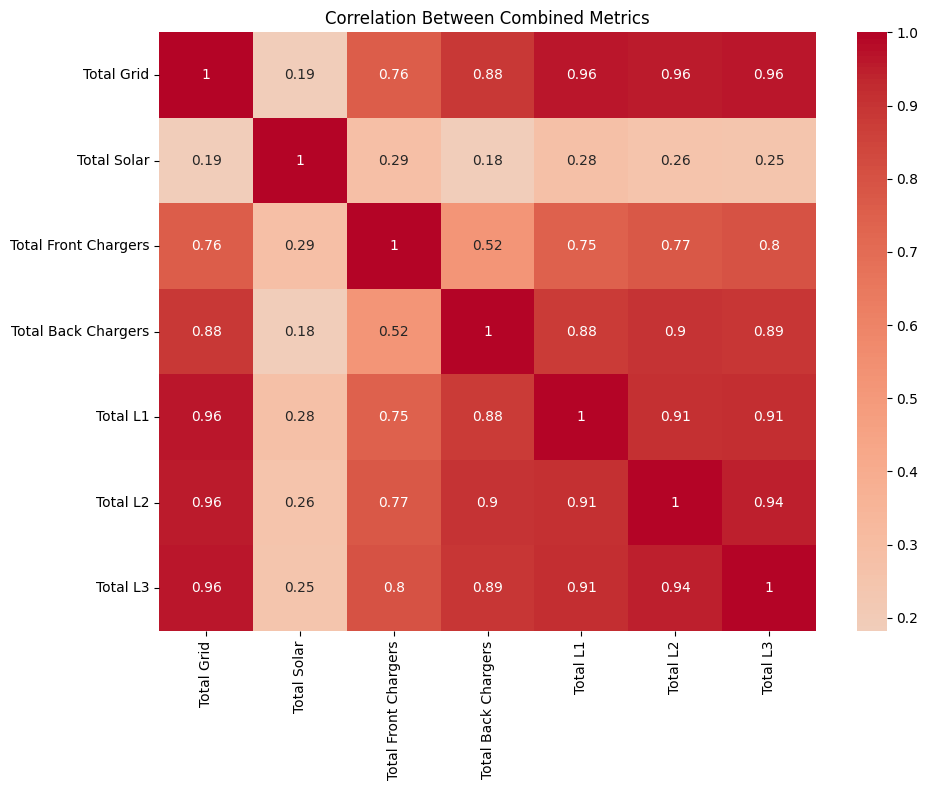

In [7]:
# Cell 5: Correlation heatmap of combined metrics
plt.figure(figsize=(10, 8))
correlation_matrix = data[combined_metrics].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Between Combined Metrics')
plt.tight_layout()
plt.show()

In [ ]:
# Cell 6: Stacked bar chart for phase distribution
phase_data = data[['Total L1', 'Total L2', 'Total L3']].resample('D', on='Date').mean()
phase_data.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Daily Average Power Distribution by Phase')
plt.xlabel('Date')
plt.ylabel('Power (kW)')
plt.legend(title='Phases')
plt.tight_layout()
plt.show()

KeyError: 'date'